# 1. Plot the 20 most frequent items in the dataset. (This wasn’t done in class but it should be easy – figure it out).

In [75]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('groceries - groceries.csv')
dataset.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Get the 20 most frequent items in dataset
from collections import Counter
items = []
for aLine in dataset.values:
    num_of_items = aLine[0]
    items.extend(aLine[1:num_of_items+1])
c = Counter(items)
frequent_items_df = pd.DataFrame(c.most_common(20),columns=['Item','Frequency'])
frequent_items_df

,Item,Frequency
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


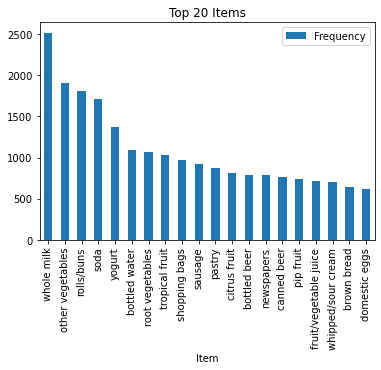

In [53]:
# Plot the 20 most frequent items in the dataset
import matplotlib.pyplot as plt
frequent_items_df.plot(kind='bar', x='Item', y='Frequency', title='Top 20 Items') 
plt.xlabel='Item'
plt.ylabel='Frequency'
plt.show()

# 2. Get frequent itemsets that have a minimum support of 0.001

In [78]:
# Convert dataset to list of list named data
data = []
for line in dataset.values:
    num = line[0]
    data.append(list(line[1:num+1])) 
data

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [80]:
# Check number of transactions(rows) and unique items(columns) to compare later
print(len(data))
num_of_unique_items = len(set([item for transaction in data for item in transaction]))
num_of_unique_items

9835


169

In [81]:
# Create a one hot encoding data frame
from mlxtend.preprocessing import TransactionEncoder

one_hot = TransactionEncoder()
one_hot_matrix = one_hot.fit_transform(data)
print(one_hot_matrix)
df = pd.DataFrame(one_hot_matrix,columns=one_hot.columns_)
df

[[False False False ... False False False]
 [False False False ... False  True False]
 [False False False ...  True False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
# get frequent itemsets with minumum support = 0.001
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support= 0.001, use_colnames=True)
print(frequent_itemsets)

        support                                           itemsets
0      0.008033                            (Instant food products)
1      0.033452                                         (UHT-milk)
2      0.003559                                 (abrasive cleaner)
3      0.003254                                 (artif. sweetener)
4      0.017692                                    (baking powder)
...         ...                                                ...
13487  0.001017  (citrus fruit, whole milk, other vegetables, r...
13488  0.001017  (tropical fruit, oil, whole milk, other vegeta...
13489  0.001322  (tropical fruit, pip fruit, whole milk, other ...
13490  0.001322  (rolls/buns, tropical fruit, whole milk, other...
13491  0.001118  (tropical fruit, whole milk, other vegetables,...

[13492 rows x 2 columns]


# 3. Obtain the rules for the itemsets obtained in step 2 and display them in descending order by lift.

In [87]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold = 1.0)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9815,(liquor),"(bottled beer, red/blush wine)",0.011083,0.004881,0.001932,0.174312,35.715787,1.877786e-03,1.205200
9814,"(bottled beer, red/blush wine)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,1.877786e-03,1.636828
101203,"(whole milk, oil, tropical fruit)","(yogurt, other vegetables, root vegetables)",0.002542,0.012913,0.001017,0.400000,30.976378,9.839526e-04,1.645145
101222,"(yogurt, other vegetables, root vegetables)","(whole milk, oil, tropical fruit)",0.012913,0.002542,0.001017,0.078740,30.976378,9.839526e-04,1.082711
101207,"(whole milk, other vegetables, tropical fruit)","(oil, yogurt, root vegetables)",0.017082,0.001932,0.001017,0.059524,30.811404,9.837768e-04,1.061237
...,...,...,...,...,...,...,...,...,...
4780,(pip fruit),(rolls/buns),0.075648,0.183935,0.013930,0.184140,1.001114,1.549719e-05,1.000251
41494,(other vegetables),"(soda, specialty chocolate)",0.193493,0.006304,0.001220,0.006306,1.000288,3.515039e-07,1.000002
41491,"(soda, specialty chocolate)",(other vegetables),0.006304,0.193493,0.001220,0.193548,1.000288,3.515039e-07,1.000069
5011,(rolls/buns),(specialty chocolate),0.183935,0.030402,0.005592,0.030404,1.000063,3.515039e-07,1.000002
